# American Sign Language Classification using Deep Learning

####  American Sign Language (ASL)
<p>American Sign Language (ASL) is the primary language used by many deaf individuals in North America, and it is also used by hard-of-hearing and hearing individuals.  The language is as rich as spoken languages and employs signs made with the hand, along with facial gestures and bodily postures.</p>
<p><strong>In this notebook</strong>, we will train a convolutional neural network(CNN) to classify images of American Sign Language (ASL) letters.  After loading, examining, and preprocessing the data, we will train the network and test its performance. We have just taken 3 lables to classify ['A','B','C'] which is already encoded as 0,1,2</p>

## 1. Import the required packages and the dataset

In [93]:
# Import packages and set numpy random seed
import pandas as pd
import numpy as np
np.random.seed(5) 
import tensorflow as tf
tf.random.set_seed(2)
from datasets import sign_language
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
# Load training and test datasets
(x_train, y_train), (x_test, y_test) = sign_language.load_data()

In [95]:
x_train.shape

(1600, 50, 50, 3)

In [96]:
x_test.shape

(400, 50, 50, 3)

In [97]:
# Training data has 1600 color images
# Testing data has 400 color images

## 2. Visualize A,B,C images from the training data

In [99]:
# Finding the first index of the A,B,C from the training data
img_indices=[]
index_A=list(np.where(y_train==0))[0][0]
index_B=list(np.where(y_train==1))[0][0]
index_C=list(np.where(y_train==2))[0][0]
img_indices.append(index_A)
img_indices.append(index_B)
img_indices.append(index_C)
img_indices

[1, 6, 0]

In [100]:
# We see that A,B,C labels are at 1,6,0 index positions respectively.
# We will use this to visualize the images as done below.

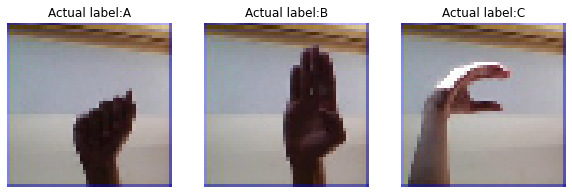

In [101]:
label_map={0:"A",1:"B",2:"C"}
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
img=y_train[img_indices[0]]
labl=label_map.get(img)
plt.imshow(x_train[img_indices[0],:,:])
plt.axis('off'), plt.title("Actual label:"+labl)

plt.subplot(1,3,2)
img=y_train[img_indices[1]]
labl=label_map.get(img)
plt.imshow(x_train[img_indices[1],:,:])
plt.axis('off'), plt.title("Actual label:"+labl)

plt.subplot(1,3,3)
img=y_train[img_indices[2]]
labl=label_map.get(img)
plt.imshow(x_train[img_indices[2],:,:])
plt.axis('off'), plt.title("Actual label:"+labl)

plt.show()

## 3. Examine the dataset

In [102]:
# We will see how many images are there in each class 0,1,2(A,B,C) both in train and test datasets

train_0=len(y_train[y_train==0])
train_1=len(y_train[y_train==1])
train_2=len(y_train[y_train==2])

test_0=len(y_test[y_test==0])
test_1=len(y_test[y_test==1])
test_2=len(y_test[y_test==2])

print("Train Data:")
print("No. of images in Class 0(A):",train_0)
print("No. of images in Class 1(B):",train_1)
print("No. of images in Class 2(C):",train_2)
print()
print("Test Data:")
print("No. of images in Class 0(A):",test_0)
print("No. of images in Class 1(B):",test_1)
print("No. of images in Class 2(C):",test_2)

Train Data:
No. of images in Class 0(A): 540
No. of images in Class 1(B): 528
No. of images in Class 2(C): 532

Test Data:
No. of images in Class 0(A): 118
No. of images in Class 1(B): 144
No. of images in Class 2(C): 138


In [103]:
# We see that the labels are pretty balanced in the training data which is good. No class imbalance see.

## 4. Encode the labels

In [104]:
# Class A,B,C in y_train and y_test are encoded as 0,1,2. But to use keras, we would need to perform ONE-HOT ENCODING.
#0 is encoded as [1, 0, 0],
#1 is encoded as [0, 1, 0],
#2 is encoded as [0, 0, 1].

In [105]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [106]:
y_train_encoded.shape

(1600, 3)

In [107]:
y_test_encoded.shape

(400, 3)

In [ ]:
# We can see a column add for each label amounting to 3 columns in the encoded y_train and y_test.

## 5. Model Building

In [108]:
# We will now build a convolution neural network and verify the performance for accuracy and overfitting.

In [109]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
# First convolutional layer accepts image input
model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu',input_shape=(50, 50, 3)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(4,4)))

# Add a convolutional layer
model.add(Conv2D(filters=15, kernel_size=5, padding='same', activation='relu',input_shape=(50, 50, 3)))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(4,4)))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 5)         380       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        1890      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 135)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 408       
Total params: 2,678
Trainable params: 2,678
Non-trainable params: 0
______________________________________________________

## 6. Compling and train the CNN model

In [ ]:
# We will now aggregate the optimizer,loss and metric to be used.

In [119]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [120]:
# Train the model
model_fit = model.fit(x_train,y_train_encoded,epochs=2)

Epoch 1/2
50/50 [==============================] - 1s 18ms/step - loss: 0.1100 - accuracy: 0.9787
Epoch 2/2
50/50 [==============================] - 1s 17ms/step - loss: 0.0650 - accuracy: 0.9919


## 7. Test the model

In [121]:
# Here we are checking for accuracy and whether the model is overfitting or not.

In [122]:
# accuracy on train set
score_train = model.evaluate(x_train,y_train_encoded,verbose=0)
print('Train accuracy:', score_train[1])

# accuracy on test set
score_test = model.evaluate(x_test,y_test_encoded,verbose=0)
print('Test accuracy:', score_test[1])

Train accuracy: 0.9925000071525574
Test accuracy: 0.9950000047683716


In [123]:
# The constructed CNN model is performing very well with ~99% accuracy both on test aand the train data.
# Hence, we can say that there is NO OVERFITTING.

## 8. Visualize the misclassified images

In [156]:
labels = ['A','B','C']

# Get predicted labels for test dataset
y_preds = model.predict_classes(x_test)

# Indices corresponding to test images which were mislabeled
mislabeled_indices = np.where(y_test != y_preds)[0]
mislabeled_indices

array([265, 352], dtype=int64)

In [157]:
y_preds[265],y_preds[352]

(0, 0)

In [158]:
y_test[265],y_test[352]

(1, 1)

In [159]:
# We see that at indicess 265 and 352 misclassification has occurred.
# Both "B" signs are misclassified as "A".

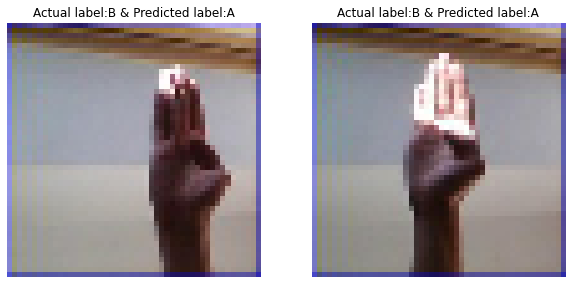

In [160]:
label_map={0:"A",1:"B",2:"C"}
plt.figure(figsize=(10,20))

plt.subplot(1,2,1)
img=y_test[mislabeled_indices[0]]
img_pred=y_preds[mislabeled_indices[0]]
labl=label_map.get(img)
labl_pred=label_map.get(img_pred)
plt.imshow(x_test[mislabeled_indices[0],:,:])
plt.axis('off'), plt.title("Actual label:"+labl+" & Predicted label:"+labl_pred)

plt.subplot(1,2,2)
img=y_test[mislabeled_indices[1]]
img_pred=y_preds[mislabeled_indices[1]]
labl=label_map.get(img)
labl_pred=label_map.get(img_pred)
plt.imshow(x_test[mislabeled_indices[1],:,:])
plt.axis('off'), plt.title("Actual label:"+labl+" & Predicted label:"+labl_pred)

plt.show()

# Conclusion:

1. We divided the data into training and test sets with 1600 and 400 images respectively.
2. Visualised the training data and familiarised with the sign symbols.
3. Labels 'A', 'B' and 'C' are encoded as 0, 1, and 2, respectively for both train and test datasets.
4. Defined a convolutional neural network to classify the data.
5. Compiled the model with the 'adam' optimizer, 'categorical_crossentropy' as the loss function, and 'accuracy' as a metric.
6. Trained the data with the arguments x_train,y_train_encoded,epochs=2.
7. The model is a good fit with an accuracy of ~99% on both the train and test datasets.
8. Visualised the model prediction mistakes which were only 2 misclassifications.